In [694]:
import yfinance as yf 
from datetime import datetime ,timedelta
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ta

In [780]:
end_date = "2025-04-16"
start_date = pd.to_datetime(end_date)- timedelta(days=365*5)
stocks = ["MANINFRA.NS" , "KFINTECH.NS" , "NAVA.NS" , "IEX.NS" , "EMSLIMITED.NS" , "TEXRAIL.NS" , "VPRPL.NS" , "RELIANCE.NS" , "EASEMYTRIP.NS" ,"COCHINSHIP.NS" , "BLUEJET.NS" , "LUPIN.NS" , "CAMS.NS" , "GAIL.NS" ]

In [781]:
nifty50_ticker = "^NSEI"

# Fetch data from yfinance
nifty50_data = yf.download(nifty50_ticker, start=start_date, end="2025-04-16", interval="1d")

# Display the first few rows
nifty50_data

[*********************100%***********************]  1 of 1 completed



Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2020-04-17,9266.750000,9324.000000,9091.349609,9323.450195,684200
2020-04-20,9261.849609,9390.849609,9230.799805,9390.200195,726400
2020-04-21,8981.450195,9044.400391,8909.400391,9016.950195,655100
2020-04-22,9187.299805,9209.750000,8946.250000,9026.750000,734400
2020-04-23,9313.900391,9343.599609,9170.150391,9232.349609,666700
...,...,...,...,...,...
2025-04-07,22161.599609,22254.000000,21743.650391,21758.400391,647100
2025-04-08,22535.849609,22697.199219,22270.849609,22446.750000,468300


In [782]:
df = yf.download(stocks , start = start_date , end = end_date)

[*********************100%***********************]  14 of 14 completed



In [783]:
# df = df.stack()
df = df.stack()

In [784]:
df

Price                           Close         High          Low         Open  \
Date       Ticker                                                              
2020-04-17 COCHINSHIP.NS   112.726639   118.547620   108.804263   110.577679   
           GAIL.NS          48.311367    49.523191    47.449627    49.523191   
           IEX.NS           48.446556    49.616763    47.572801    48.680597   
           LUPIN.NS        800.392273   822.537514   795.865859   818.643845   
           MANINFRA.NS      11.883827    12.663606    11.571915    12.663606   
...                               ...          ...          ...          ...   
2025-04-15 MANINFRA.NS     153.009995   154.119995   147.800003   147.800003   
           NAVA.NS         490.649994   496.000000   482.399994   487.000000   
           RELIANCE.NS    1240.099976  1251.000000  1237.099976  1251.000000   
           TEXRAIL.NS      138.259995   138.600006   135.559998   136.600006   
           VPRPL.NS        170.449997   173.070007   165.380005   166.899994   

Price                         Volume  
Date       Ticker                     
2020-04-17 COCHINSHIP.NS   1504718.0  
           GAIL.NS        17075415.0  
           IEX.NS           474132.0  
           LUPIN.NS        3328045.0  
           MANINFRA.NS      358036.0  
...                              ...  
2025-04-15 MANINFRA.NS     2168127.0  
           NAVA.NS          556711.0  
           RELIANCE.NS    13378535.0  
           TEXRAIL.NS      1461927.0  
           VPRPL.NS         667580.0  

[13729 rows x 5 columns]

In [785]:
df["Suppourt"] = 0
df["Resistance"] = 0


In [ ]:
def Resistance(df, index):

    # Ensure the index is valid
    if index <= 0 or index >= len(df):
        return None  # Return None if the index is out of range
    
    # Filter rows where 'Close' is greater than or equal to the current 'Close'
    mask = df.iloc[max(0, index-50):index]["Close"] >= df.iloc[index]["Close"]
    
    # Find the most frequent 'Close' value in the filtered rows
    resistance_value_counts = df.iloc[max(0, index-50):index]["Close"][mask].value_counts()
    if not resistance_value_counts.empty:
        return resistance_value_counts.idxmax()
    return None  # No resistance level found


def Support(df, index):

    # Ensure the index is valid
    if index <= 0 or index >= len(df):
        return None  # Return None if the index is out of range
    
    # Filter rows where 'Close' is less than or equal to the current 'Close'
    mask = df.iloc[max(0, index-50):index]["Close"] <= df.iloc[index]["Close"]
    
    # Find the most frequent 'Close' value in the filtered rows
    support_value_counts = df.iloc[max(0, index-50):index]["Close"][mask].value_counts()
    if not support_value_counts.empty:
        return support_value_counts.idxmax()
    return None  # No support level found



C:\Users\AMAN\AppData\Local\Temp\ipykernel_11368\1390452729.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[None, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.6081237792969, 412.608123

In [ ]:
# Apply the functions to each group
grouped_df = df.groupby(level="Ticker")

for ticker, df_ in grouped_df:
    df.loc[df_.index, "Resistance"] = [Resistance(df_, i) for i in range(len(df_))]
    df.loc[df_.index, "Suppourt"] = [Support(df_, i) for i in range(len(df_))]

In [791]:
df

Price                         Close         High          Low         Open  \
Date       Ticker                                                            
2020-04-21 IEX.NS         48.508961    53.657869    48.368535    51.177030   
           LUPIN.NS      790.901550   823.024321   770.946496   774.353456   
           MANINFRA.NS    12.445269    12.819562    11.852636    12.819562   
           RELIANCE.NS   555.743164   562.323025   522.798769   543.459151   
2020-04-22 GAIL.NS        45.349133    45.833864    43.248639    44.487392   
...                             ...          ...          ...          ...   
2025-04-15 MANINFRA.NS   153.009995   154.119995   147.800003   147.800003   
           NAVA.NS       490.649994   496.000000   482.399994   487.000000   
           RELIANCE.NS  1240.099976  1251.000000  1237.099976  1251.000000   
           TEXRAIL.NS    138.259995   138.600006   135.559998   136.600006   
           VPRPL.NS      170.449997   173.070007   165.380005   166.899994   

Price                       Volume     Suppourt   Resistance  
Date       Ticker                                             
2020-04-21 IEX.NS        2231961.0    48.446556    50.786964  
           LUPIN.NS      5837165.0   788.224609   800.392273  
           MANINFRA.NS    369130.0    11.883827     13.00671  
           RELIANCE.NS  61371628.0    549.74707   558.640137  
2020-04-22 GAIL.NS      20768650.0    44.433533    48.311367  
...                            ...          ...          ...  
2025-04-15 MANINFRA.NS   2168127.0   136.050003   199.041412  
           NAVA.NS        556711.0   411.100006   495.350006  
           RELIANCE.NS  13378535.0  1238.849976  1278.199951  
           TEXRAIL.NS    1461927.0   124.269997   182.529999  
           VPRPL.NS       667580.0   152.559998   240.100006  

[11663 rows x 7 columns]

In [792]:
df.dropna(inplace=True)

<h2>CALCULATE THE INDICATORS</h2>
<li>RSI</li>
<li>MA</li>
<li>MACD</li>
<li>BOLLINGER BANDS</li>
<li>VWAP</li>

In [793]:
# rsi 
df["rsi"] = df.groupby(level="Ticker")["Close"].transform(lambda x : pandas_ta.rsi(close = x , length = 20))

<Axes: xlabel='Date'>

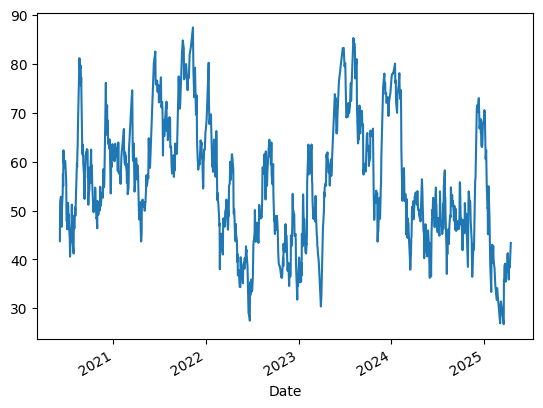

In [794]:
df.xs("MANINFRA.NS", level="Ticker")["rsi"].plot() 

In [795]:
# bbsnds
df["bb_lower"] = df.groupby(level="Ticker")["Close"].transform(lambda x : pandas_ta.bbands(x , length = 20).iloc[:,0])  
df["bb_upper"] = df.groupby(level="Ticker")["Close"].transform(lambda x : pandas_ta.bbands(x , length = 20).iloc[:,2])
df["bb_mid"] = df.groupby(level="Ticker")["Close"].transform(lambda x : pandas_ta.bbands(x , length = 20).iloc[:,1]) 

In [796]:
def comutemacd(x):
    macd = pandas_ta.macd(x, fast=12, slow=26, signal=9)  
    return macd.iloc[: , 0] 

df["macd"] = df.groupby(level="Ticker", group_keys=False)["Close"].transform(lambda x: comutemacd(x))

In [797]:
#  200 day moving average 
df["200ma"] = df.groupby(level="Ticker")["Close"].transform(lambda x : x.rolling(window=200).mean()) 
# 50 day moving average 
df["50ma"] = df.groupby(level="Ticker")["Close"].transform(lambda x : x.rolling(window=50).mean()) 

In [798]:
# VWAP 
# df["monthlyvolume"] = df.unstack()["Close"].resample("1M").mean()
# Calculate volume-weighted price
df["volumeweight"] = df["Close"] * df["Volume"]

# Calculate rolling cumulative volume and volume-weighted price
df["cumvolume"] = (
    df.groupby(level="Ticker")["Volume"]
    .rolling(window=30)
    .sum()
    .reset_index(level=0, drop=True)  # Reset index to align with the original DataFrame
)

df["cumvolumeweight"] = (
    df.groupby(level="Ticker")["volumeweight"]
    .rolling(window=30)
    .sum()
    .reset_index(level=0, drop=True)
)

# Calculate VWAP
df["vwap"] = df["cumvolumeweight"] / df["cumvolume"]


In [799]:
data = df.xs("EASEMYTRIP.NS" , level="Ticker").iloc[-1].values

In [800]:
df.dropna(inplace=True)

In [801]:
df.drop(columns=["volumeweight" , "cumvolume" , "cumvolumeweight"] , inplace=True)

In [802]:
df["pct_change"] = df.groupby(level="Ticker")["Close"].transform(lambda x : x.pct_change(1).shift(1))

In [803]:
df.dropna(inplace=True)

In [804]:
df

Price                         Close         High          Low         Open  \
Date       Ticker                                                            
2021-03-05 LUPIN.NS     1012.338928  1032.130070  1009.105666  1026.790415   
2021-03-08 LUPIN.NS     1029.190796  1042.711557  1011.996047  1014.984249   
2021-03-09 LUPIN.NS     1010.967224  1037.518746   992.988618  1033.109818   
2021-03-10 LUPIN.NS     1036.343140  1040.017247  1014.151509  1019.932128   
2021-03-12 LUPIN.NS     1028.260132  1042.466680  1021.793727  1042.466680   
...                             ...          ...          ...          ...   
2025-04-15 MANINFRA.NS   153.009995   154.119995   147.800003   147.800003   
           NAVA.NS       490.649994   496.000000   482.399994   487.000000   
           RELIANCE.NS  1240.099976  1251.000000  1237.099976  1251.000000   
           TEXRAIL.NS    138.259995   138.600006   135.559998   136.600006   
           VPRPL.NS      170.449997   173.070007   165.380005   166.899994   

Price                       Volume     Suppourt   Resistance        rsi  \
Date       Ticker                                                         
2021-03-05 LUPIN.NS      1716704.0   943.853455   1018.90332  50.186228   
2021-03-08 LUPIN.NS      1409325.0   956.443481  1053.733887  52.971463   
2021-03-09 LUPIN.NS      1655727.0   963.840759   1018.90332  49.801757   
2021-03-10 LUPIN.NS      1598764.0   957.472168  1053.733887  53.849544   
2021-03-12 LUPIN.NS      1759310.0   957.815125  1053.733887  52.431947   
...                            ...          ...          ...        ...   
2025-04-15 MANINFRA.NS   2168127.0   136.050003   199.041412  43.377485   
           NAVA.NS        556711.0   411.100006   495.350006  57.260865   
           RELIANCE.NS  13378535.0  1238.849976  1278.199951  50.068399   
           TEXRAIL.NS    1461927.0   124.269997   182.529999  44.954350   
           VPRPL.NS       667580.0   152.559998   240.100006  43.120576   

Price                      bb_lower     bb_upper       bb_mid       macd  \
Date       Ticker                                                          
2021-03-05 LUPIN.NS      973.615479  1072.166473  1022.890976   0.487435   
2021-03-08 LUPIN.NS      974.114330  1069.497443  1021.805887   1.384944   
2021-03-09 LUPIN.NS      973.120209  1067.900092  1020.510150   0.618606   
2021-03-10 LUPIN.NS      973.592402  1066.315862  1019.954132   2.035439   
2021-03-12 LUPIN.NS      973.695354  1065.169466  1019.432410   2.477499   
...                             ...          ...          ...        ...   
2025-04-15 MANINFRA.NS   139.000583   159.615414   149.307999  -7.882494   
           NAVA.NS       379.633894   526.911113   453.272504  15.779788   
           RELIANCE.NS  1172.587462  1315.572499  1244.079980  -9.939599   
           TEXRAIL.NS    125.562622   147.107380   136.335001  -5.175087   
           VPRPL.NS      152.697220   175.279776   163.988498  -8.551647   

Price                         200ma         50ma         vwap  pct_change  
Date       Ticker                                                          
2021-03-05 LUPIN.NS      932.082286  1012.238010  1021.230525   -0.011829  
2021-03-08 LUPIN.NS      933.069801  1013.773296  1020.206438   -0.014451  
2021-03-09 LUPIN.NS      934.059160  1015.735758  1018.176624    0.016646  
2021-03-10 LUPIN.NS      935.144493  1017.757987  1017.441590   -0.017707  
2021-03-12 LUPIN.NS      936.261687  1019.446121  1017.373438    0.025101  
...                             ...          ...          ...         ...  
2025-04-15 MANINFRA.NS   194.724071   178.097992   153.475625    0.001868  
           NAVA.NS       425.972204   435.028502   442.068429    0.063767  
           RELIANCE.NS  1362.049215  1240.882996  1239.425288    0.028346  
           TEXRAIL.NS    201.697888   154.407600   138.337365    0.036185  
           VPRPL.NS      231.565699   198.425000   166.135789    0.020049  

[8849 rows x 16 columns]

In [805]:
df["pct_change"] = df["pct_change"]*100

In [806]:
def Replace_data(x) :
    if x > 0 :
        return 1 
    return 0

In [807]:
df["pct_change"] = df["pct_change"].astype(int).apply(Replace_data)

In [808]:
df["pct_change"].value_counts().count()

2

<h3>Calculating Feature Importance</h3>

In [722]:
from sklearn.tree import DecisionTreeClassifier

In [723]:
tree = DecisionTreeClassifier()
tree .fit(df.iloc[: , : -1] , df.iloc[: , -1])

DecisionTreeClassifier()

In [724]:
featureImportance = tree.feature_importances_

In [725]:
featureImportance

array([0.03008208, 0.03827755, 0.03949375, 0.05864124, 0.14150372,
       0.04992778, 0.03277644, 0.21115924, 0.04262815, 0.03704083,
       0.02499247, 0.16087214, 0.07307464, 0.03054026, 0.0289897 ])

In [726]:
# this means i need to do more preprocescing since some columns are in vain
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=True)
X = df.iloc[: , : -1]
scaled_x = scaler.fit_transform(X)

In [727]:
# standardizing all the  points 


In [728]:
cov_matrix = np.cov(scaled_x , rowvar=False)

In [729]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [730]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k = 10
principal_components = eigenvectors[:, :k]

data_pca = np.dot(scaled_x, principal_components)

In [731]:
data_pca

array([[-2.43421035e+00,  3.97932274e-01, -5.70132507e-01, ...,
         6.26527702e-03, -1.33395702e-03,  1.83305996e-03],
       [-2.43322001e+00,  3.21026572e-01, -5.77631271e-01, ...,
         5.53212116e-03, -1.27084748e-03,  1.57744406e-03],
       [-2.43333830e+00,  1.69129941e-01, -5.66394186e-01, ...,
         5.08773093e-03, -8.72351822e-05,  1.25392604e-03],
       ...,
       [ 2.59179821e+00,  5.15516772e-01,  9.69594502e-01, ...,
        -3.83568055e-03,  2.25609370e-02, -4.35854083e-04],
       [-1.90698553e+00, -7.75724856e-01, -3.69156767e-01, ...,
         7.52951999e-03,  2.81729618e-02,  5.15423213e-03],
       [-1.75636441e+00, -1.32597951e+00, -5.24440270e-01, ...,
         6.33577442e-03,  3.35532416e-02,  9.65348382e-03]])

In [732]:
# from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [733]:
X_train , X_test , y_Train , y_test = train_test_split(data_pca, df.iloc[: , -1] , test_size=0.2 , random_state=42)

In [734]:
from sklearn.svm import SVC
from sklearn.utils import resample
import numpy as np

# Define range of C values

model = SVC(C = 6.7 , kernel="linear" ,class_weight= { 0 : 0.8, 1:1.2})
model.fit(X_train ,y_Train)


SVC(C=6.7, class_weight={0: 0.8, 1: 1.2}, kernel='linear')

In [735]:
y_pred = model.predict(X_test) 

In [736]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred , average= None)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred , average= None)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred , average=None)
print("F1-Score:", f1)

Precision: [0.72862233 0.5       ]
Recall: [0.97226624 0.07113821]
F1-Score: [0.83299389 0.12455516]


In [737]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7194982896237172

In [ ]:
"""
In this problem I will be focussed more on recall so by that  I can assure  that this model is good for Checking whether a share price would fall or not 

"""

In [ ]:

y_pred[y_pred == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [739]:
data = df.xs("EASEMYTRIP.NS", level="Ticker").iloc[-1]

In [740]:
data

Price
Close                13.4
High                14.02
Low                 13.23
Open                13.79
Volume        132796304.0
Suppourt            12.07
Resistance          14.15
rsi             50.237614
bb_lower        11.273247
bb_upper        13.509753
bb_mid            12.3915
macd            -0.154252
200ma           18.271175
50ma              13.9434
vwap            13.025187
pct_change              1
Name: 2025-03-24 00:00:00, dtype: object

In [741]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [742]:
#  APPLYING DECISION TREEE WITH BAGGING 
base_estimator = DecisionTreeClassifier(random_state=42 , class_weight= { 0 : 0.8, 1:1.2})

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, 
                                 n_estimators=50,  # Number of tree
                                 max_samples=0.3,
                                 random_state=42, 
                                 n_jobs=-1)       # Use all processors

In [743]:
bagging_clf.fit(X_train, y_Train)

c:\Users\AMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.8,
                                                                      1: 1.2},
                                                        random_state=42),
                  max_samples=0.3, n_estimators=50, n_jobs=-1, random_state=42)

In [744]:
y_pred_decessiontree = bagging_clf.predict(X_test)

In [745]:
from sklearn.model_selection import cross_val_score

In [746]:
cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')

In [747]:
cv_scores.mean()

0.7217777777777779

In [749]:
y_pred[y_pred == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [845]:
data = df.xs("KFINTECH.NS", level="Ticker").iloc[-2].to_numpy()

In [846]:
data

array([998.3499755859375, 1046.949951171875, 991.25, 1040.0, 820287.0,
       913.4500122070312, 1073.050048828125, 47.41168309992031,
       892.8875371871503, 1143.3124506058184, 1018.0999938964844,
       5.595329965799465, 988.0143966674805, 1012.2760021972656,
       977.8006223422077, 0], dtype=object)

In [847]:
data_scaled = (data[:-1] - scaler.mean_)/scaler.scale_

In [848]:
data_scaled.shape

(15,)

In [849]:
principal_components

array([[ 2.88756577e-01,  4.09540262e-02,  1.71799388e-02,
         2.82024567e-02,  5.49937704e-02, -2.92361744e-02,
        -1.69993529e-01, -4.80192279e-02,  2.87740253e-01,
        -2.81591212e-01],
       [ 2.88688150e-01,  4.28023438e-02,  1.72093386e-02,
         3.18887115e-02,  7.67504527e-02, -4.46593958e-02,
        -1.49899287e-01, -8.42650668e-02,  3.59233440e-01,
        -1.64844420e-02],
       [ 2.88737471e-01,  4.15164006e-02,  1.72386288e-02,
         3.00210635e-02,  3.91837179e-02, -1.07919091e-02,
        -1.81094766e-01, -2.46844748e-02,  3.64451064e-01,
        -1.62564555e-01],
       [ 2.88672254e-01,  4.30979733e-02,  1.72541435e-02,
         3.36102958e-02,  5.90452091e-02, -2.72305818e-02,
        -1.59175528e-01, -7.46826645e-02,  3.99765991e-01,
         2.09941238e-01],
       [-5.50891959e-02, -1.69575521e-02,  9.98072315e-01,
        -2.26148547e-02,  3.00441768e-03, -2.72747577e-03,
         6.72426170e-04, -8.43393942e-04, -8.48656998e-05,
         3.

In [850]:
x = np.dot(data_scaled , principal_components)

In [851]:
model.predict(x.reshape(1,-1))

array([0], dtype=int64)

In [852]:
data[-1]

0